In [1]:
import h5py
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3
from scipy.stats import skew

plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

In [2]:
Ro = 0.1
rand_seed = 1

file_idx = 1

spname = 'Ro_%.2f/QGp1_sp_%.2f_%d/QGp1_sp_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, file_idx)
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    P1_q_data = np.squeeze(np.array(file['tasks']['PV']))
    P1_zeta_data = np.squeeze(np.array(file['tasks']['zeta']))
    P1_div_data = np.squeeze(np.array(file['tasks']['div']))
    P1_h_data = np.squeeze(np.array(file['tasks']['h']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])


spname = 'Ro_%.2f/SW_sp_%.2f_%d/SW_sp_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, file_idx)
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    SW_q_data = np.squeeze(np.array(file['tasks']['q']))
    SW_zeta_data = np.squeeze(np.array(file['tasks']['zeta']))
    SW_div_data = np.squeeze(np.array(file['tasks']['div']))
    SW_h_data = np.squeeze(np.array(file['tasks']['h']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])

[2.00000000e-10 9.97701742e-01 1.99919973e+00 3.00058921e+00
 3.99951252e+00 5.00181651e+00 5.99768070e+00 7.00217313e+00
 7.99880514e+00 9.00248230e+00 1.00001808e+01 1.09989474e+01
 1.20018075e+01 1.29999758e+01 1.39964331e+01 1.49978137e+01
 1.59992290e+01 1.70023438e+01 1.79991935e+01 1.89977782e+01]
[2.00000000e-10 9.96388653e-01 1.99847274e+00 2.99829251e+00
 4.00179651e+00 5.00114867e+00 5.99700988e+00 7.00074984e+00
 8.00324335e+00 8.99917881e+00 1.00026605e+01 1.09998357e+01
 1.20027341e+01 1.29984629e+01 1.40009025e+01 1.49972109e+01
 1.59991114e+01 1.69982930e+01 1.79989114e+01 1.89996350e+01]


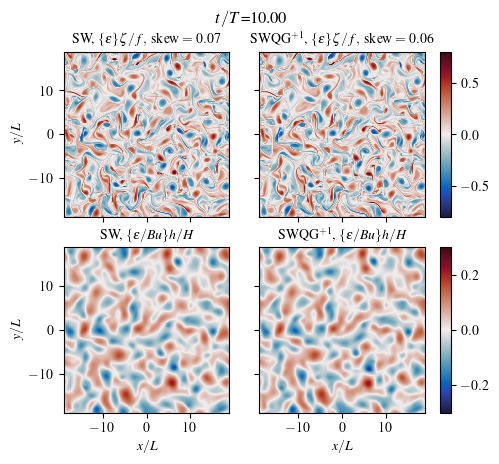

In [3]:
time_idx = 10

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(5, 5))
fig.suptitle('$t/T$=%.2f' %(sim_time_ary[time_idx]),y=0.94)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

clim = 0.8
im0 = grid[0].pcolormesh(x,y,Ro*SW_zeta_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
# im0 = grid[0].contour(x,y,Ro*SW_div_data[time_idx,:,:].T, [-0.004, 0.004], colors='black', linewidths=0.3)
grid[0].set_aspect('equal')
grid[0].set_xlabel("$x/L$"); 
grid[0].set_ylabel("$y/L$")
grid[0].set_title(r"SW, $\{\varepsilon\}\zeta/f,~\mathrm{skew}=%.2f$" %(skew(SW_zeta_data[time_idx,:,:].ravel())))

im1 = grid[1].pcolormesh(x,y,Ro*P1_zeta_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
# im1 = grid[1].contour(x,y,Ro*P1_div_data[time_idx,:,:].T, [-0.004, 0.004], colors='black', linewidths=0.3)
grid[1].set_aspect('equal')
grid[1].set_xlabel("$x/L$"); 
grid[1].set_title(r"SWQG$^{+1}$, $\{\varepsilon\}\zeta/f,~\mathrm{skew}=%.2f$" %(skew(P1_zeta_data[time_idx,:,:].ravel())))

clim = 0.3
im2 = grid[2].pcolormesh(x,y,Ro*SW_h_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[2].set_aspect('equal')
grid[2].set_xlabel("$x/L$"); 
grid[2].set_ylabel("$y/L$")
grid[2].set_title(r"SW, $\{\varepsilon/Bu\}h/H$")

im3 = grid[3].pcolormesh(x,y,Ro*P1_h_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[3].set_aspect('equal')
grid[3].set_xlabel("$x/L$"); 
grid[3].set_title(r"SWQG$^{+1}$, $\{\varepsilon/Bu\}h/H$")

# Colorbar
cbar = grid[1].cax.colorbar(im1)
cbar = grid[3].cax.colorbar(im3)

figname = 'figs/snap_t%d' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

plt.show()

In [4]:
Ro = 0.1
rand_seed = 1

file_idx = 11

spname = 'Ro_%.2f/QGp1_sp_%.2f_%d/QGp1_sp_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, file_idx)
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    P1_q_data = np.squeeze(np.array(file['tasks']['PV']))
    P1_zeta_data = np.squeeze(np.array(file['tasks']['zeta']))
    P1_div_data = np.squeeze(np.array(file['tasks']['div']))
    P1_h_data = np.squeeze(np.array(file['tasks']['h']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])


spname = 'Ro_%.2f/SW_sp_%.2f_%d/SW_sp_%.2f_%d_s%i' %(Ro, Ro,rand_seed, Ro,rand_seed, file_idx)
spname = spname.replace(".", "d" ); spname = "../"+spname+'.h5'

with h5py.File(spname, mode='r') as file:
    SW_q_data = np.squeeze(np.array(file['tasks']['q']))
    SW_zeta_data = np.squeeze(np.array(file['tasks']['zeta']))
    SW_div_data = np.squeeze(np.array(file['tasks']['div']))
    SW_h_data = np.squeeze(np.array(file['tasks']['h']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])

[199.99494657 201.00303723 201.99557512 202.9958728  204.00295364
 205.00282601 206.00346052 207.00324117 208.00398874 208.9984913
 209.99912643 210.99843412 212.00454637 213.00047328 213.99649458
 214.99764462 215.9993903  217.003435   218.00378502 219.00287186]
[200.00096172 201.00067994 201.99702653 203.00202641 203.99642558
 205.00044567 206.00108793 206.99792549 207.99676387 209.00055602
 209.99619588 210.99886243 211.99868602 212.99937433 214.00418645
 215.00169364 215.99743806 216.99565388 218.00120711 219.00094289]


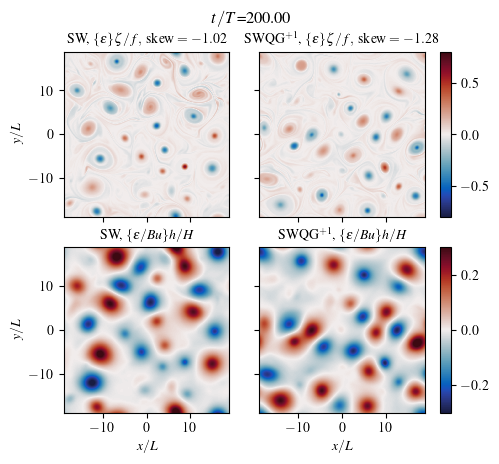

In [5]:
time_idx = 0

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(5, 5))
fig.suptitle('$t/T$=%.2f' %(sim_time_ary[time_idx]),y=0.94)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

clim = 0.8
im0 = grid[0].pcolormesh(x,y,Ro*SW_zeta_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
# im0 = grid[0].contour(x,y,Ro*SW_div_data[time_idx,:,:].T, [-0.001/2, 0.001/2], colors='black', linewidths=0.3)
grid[0].set_aspect('equal')
grid[0].set_xlabel("$x/L$"); 
grid[0].set_ylabel("$y/L$")
grid[0].set_title(r"SW, $\{\varepsilon\}\zeta/f,~\mathrm{skew}=%.2f$" %(skew(SW_zeta_data[time_idx,:,:].ravel())))

im1 = grid[1].pcolormesh(x,y,Ro*P1_zeta_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
# im1 = grid[1].contour(x,y,Ro*P1_div_data[time_idx,:,:].T, [-0.001/2, 0.001/2], colors='black', linewidths=0.3)
grid[1].set_aspect('equal')
grid[1].set_xlabel("$x/L$"); 
grid[1].set_title(r"SWQG$^{+1}$, $\{\varepsilon\}\zeta/f,~\mathrm{skew}=%.2f$" %(skew(P1_zeta_data[time_idx,:,:].ravel())))

clim = 0.3
im2 = grid[2].pcolormesh(x,y,Ro*SW_h_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[2].set_aspect('equal')
grid[2].set_xlabel("$x/L$"); 
grid[2].set_ylabel("$y/L$")
grid[2].set_title(r"SW, $\{\varepsilon/Bu\}h/H$")

im3 = grid[3].pcolormesh(x,y,Ro*P1_h_data[time_idx,:,:].T, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[3].set_aspect('equal')
grid[3].set_xlabel("$x/L$"); 
grid[3].set_title(r"SWQG$^{+1}$, $\{\varepsilon/Bu\}h/H$")

# Colorbar
cbar = grid[1].cax.colorbar(im1)
cbar = grid[3].cax.colorbar(im3)

figname = 'figs/snap_t%d' %sim_time_ary[time_idx]
figname = figname.replace(".", "d" ); figname = figname+'.png'
plt.savefig(figname, bbox_inches='tight', dpi=800)

plt.show()